In [2]:
import requests
from bs4 import BeautifulSoup
import time
import re
import time
import os


In [65]:
# url_to_scrape = 'http://censusindia.gov.in/pca/cdb_pca_census/cd_block.html'
# r = requests.get(url_to_scrape)
# soup = BeautifulSoup(r.text)
# print(soup)
state_links = []
# for tag in soup.find_all("font", string="C.D. Block Wise Primary Census Abstract Data(PCA) "):
#     table = tag.parent.parent.parent
#     break

# for anchor in table.find_all(href=True):
#     state_links.append({"href": anchor['href'], "state": anchor.contents[0].strip()})

state_links = [
# {"href": "Houselisting-housing-Maha.html", "state" : "Maharashtra"}, 
#                {"href": "Houselisting-housing-Aurnachal_Pradesh.html",
#                "state": "Arunachal Pradesh"},
              {"href": "Houselisting-housing-Jamu_&kasmir.html", "state": "Jammu and Kashmir"}
              ]

base_link = "http://censusindia.gov.in/pca/cdb_pca_census/"
xlsx_links = []
for link in state_links:
    if link["href"].endswith('.html'):
        print('Fetching xlsx links from', base_link + link["href"])
        r1 = requests.get(base_link + link["href"])
        link_page = BeautifulSoup(r1.text)
        table = ""
        for tag in link_page.find_all("font", string="C.D. Block Wise Primary Census Abstract Data(PCA)"):
            table = tag.parent.parent.parent
            break
        for xlsx in table.find_all(href=True):
            print('Fetching xlsx from', base_link + xlsx["href"])
            
            filename = 'data/census/'+ link["state"] + '/' + xlsx.contents[0].strip() +'.xlsx'
            if xlsx['href'].endswith('.xlsx'):
                if not os.path.exists(os.path.dirname(filename)):
                    try:
                        os.makedirs(os.path.dirname(filename))
                    except OSError as exc: # Guard against race condition
                        if exc.errno != errno.EEXIST:
                            raise
                r1 = requests.get(base_link + xlsx["href"])
                output = open(filename, 'wb')
                output.write(r1.content)
                output.close()
        time.sleep(1)
print("Completed Fetching data")


Fetching xlsx links from http://censusindia.gov.in/pca/cdb_pca_census/Houselisting-housing-Jamu_&kasmir.html


C:\Users\Sid\AppData\Local\Continuum\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\Sid\AppData\Local\Continuum\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0114-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0102-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0109-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0108-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0116-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0111-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0121-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0104-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0107-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0118-F-Census.xlsx
Fetching xlsx from http://censusindia.gov.in/pca/cdb_pca_census/PCA CDB-0115-F-Census.xlsx

In [34]:
import xlrd
import csv

def open_file(path):
    """
    Open and read an Excel file
    """
    book = xlrd.open_workbook(path)
    first_sheet = book.sheet_by_index(0)
    first_row = first_sheet.row_values(0)
    first_row_val = first_row[0].split(";")
    state = ""
    district = ""
    if "SIKKIM" in first_row[0]:
        state = "SIKKIM"
        district = first_row[0].split("DISTRICT:")[1].strip().title()
    elif len(first_row_val) == 2:
        if "STATE:" in first_row_val[0]:
            state = first_row_val[0].split("STATE:")[1].strip().title()
        if "DISTRICT:" in first_row_val[1]:
            district = first_row_val[1].split("DISTRICT:")[1].strip().title()
        if "UNION TERRITORY:" in first_row_val[0]:
            state = first_row_val[0].split("UNION TERRITORY:")[1].strip().title()
            if district == "":
                district = state
    if state == "" or district == "":
        print(first_row_val)
        
    sex_ratio_total = str(first_sheet.cell(4,4).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    sex_ratio_rural = str(first_sheet.cell(4,7).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    sex_ratio_urban = str(first_sheet.cell(4,10).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
        
    total_households = str(first_sheet.cell(55,4).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    rural_households = str(first_sheet.cell(55,7).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    urban_households = str(first_sheet.cell(55,10).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    
    total_electricity_pct = str(first_sheet.cell(49,4).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    rural_electricity_pct = str(first_sheet.cell(49,7).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    urban_electricity_pct = str(first_sheet.cell(49,10).value).strip().replace("\"", '').replace("\n", "").replace(",", "")

    total_landline_pct = str(first_sheet.cell(62,4).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    rural_landline_pct = str(first_sheet.cell(62,7).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    urban_landline_pct = str(first_sheet.cell(62,10).value).strip().replace("\"", '').replace("\n", "").replace(",", "")

    total_mobile_pct = str(first_sheet.cell(63,4).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    rural_mobile_pct = str(first_sheet.cell(63,7).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    urban_mobile_pct = str(first_sheet.cell(63,10).value).strip().replace("\"", '').replace("\n", "").replace(",", "")

    total_internet_pct = str(first_sheet.cell(64,4).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    rural_internet_pct = str(first_sheet.cell(64,7).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    urban_internet_pct = str(first_sheet.cell(64,10).value).strip().replace("\"", '').replace("\n", "").replace(",", "")
    
    
    return [state, district, 
            sex_ratio_total, sex_ratio_rural, sex_ratio_urban, 
            total_households, rural_households, urban_households, 
            total_electricity_pct, rural_electricity_pct, urban_electricity_pct,
            total_landline_pct, rural_landline_pct, urban_landline_pct,
            total_mobile_pct, rural_mobile_pct, urban_mobile_pct,
            total_internet_pct, rural_internet_pct, urban_internet_pct]
 
if __name__ == "__main__":
    internet_penentration_per_district = [['State', 'District',
                                           'Total Sex Ratio', 'Rural Sex Ration', 'Urban Ratio',
                                           'Total Households', 'Rural Households', 'Urban Households', 
                                           'Total Households With Electricity Pct', 'Rural Households With Electricity Pct', 'Urban Households With Electricity Pct',
                                           'Total Households With Landline Conn Pct', 'Rural Households With Landline Conn Pct', 'Urban Households With Landline Conn Pct',
                                           'Total Households With Mobile Conn Pct', 'Rural Households With Mobile Conn Pct', 'Urban Households With Mobile Conn Pct',
                                           'Total Households With Internet Pct', 'Rural Households With Internet Pct', 'Urban Households With Internet Pct'
                                          ]]
    for root, dirs, files in os.walk("data/niti", topdown=False):
        for name in files:
            if name.endswith(".xls") or name.endswith(".xlsx"):
    #             print(os.path.join(root, name))
                arr = open_file(os.path.join(root, name))
                internet_penentration_per_district.append(arr)
    print(len(internet_penentration_per_district))

674


In [35]:
myFile = open('data/niti/internet_penentration_per_district.csv', 'w', newline='')
with myFile:
    writer = csv.writer(myFile, dialect='excel')
    writer.writerows(internet_penentration_per_district)


In [36]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

niti_df = pd.read_csv('data/niti/internet_penentration_per_district.csv', index_col=['State'])

In [38]:
niti_df.head()

,District,Total Sex Ratio,Rural Sex Ration,Urban Ratio,Total Households,Rural Households,Urban Households,Total Households With Electricity Pct,Rural Households With Electricity Pct,Urban Households With Electricity Pct,Total Households With Landline Conn Pct,Rural Households With Landline Conn Pct,Urban Households With Landline Conn Pct,Total Households With Mobile Conn Pct,Rural Households With Mobile Conn Pct,Urban Households With Mobile Conn Pct,Total Households With Internet Pct,Rural Households With Internet Pct,Urban Households With Internet Pct
State,,,,,,,,,,,,,,,,,,,
Andaman And Nicobar Islands,Nicobar,777.0,777.0,-,9959.0,9959.0,-,93.39291093483281,93.39291093483281,15,2.81,2.81,0.0,62.64,62.64,0.0,0.57,0.57,0.0
Andaman And Nicobar Islands,North And Middle Andaman,925.0,924.0,952.0,26327.0,25586.0,741.0,70.80563679872375,70.41741577425155,84.21052631578947,3.36,3.39,2.43,61.32,61.17,66.67,1.47,1.46,1.89
Andaman And Nicobar Islands,South Andaman (Andaman),871.0,869.0,872.0,57090.0,23485.0,33605.0,91.92327903310562,83.17649563551203,98.03600654664486,2.94,3.19,2.76,78.65,74.52,81.54,4.89,1.67,7.13
Andhra Pradesh,Anantapur,977.0,971.0,991.0,961165.0,698439.0,262726.0,93.42516633460436,91.92842896802728,97.40413967403302,1.19,0.97,1.59,54.92,49.76,64.58,0.57,0.29,1.1
Andhra Pradesh,Srikakulam,1015.0,1011.0,1033.0,689323.0,580048.0,109275.0,89.28064202122953,87.97065070476926,96.2342713337909,2.73,2.62,3.32,42.77,39.9,58.03,0.58,0.31,2.02


In [39]:
niti_df.dtypes

District                                   object
Total Sex Ratio                            object
Rural Sex Ration                           object
Urban Ratio                                object
Total Households                           object
Rural Households                           object
Urban Households                           object
Total Households With Electricity Pct      object
Rural Households With Electricity Pct      object
Urban Households With Electricity Pct      object
Total Households With Landline Conn Pct    object
Rural Households With Landline Conn Pct    object
Urban Households With Landline Conn Pct    object
Total Households With Mobile Conn Pct      object
Rural Households With Mobile Conn Pct      object
Urban Households With Mobile Conn Pct      object
Total Households With Internet Pct         object
Rural Households With Internet Pct         object
Urban Households With Internet Pct         object
dtype: object

In [40]:
niti_df.columns

Index(['District', 'Total Sex Ratio', 'Rural Sex Ration', 'Urban Ratio',
       'Total Households', 'Rural Households', 'Urban Households',
       'Total Households With Electricity Pct',
       'Rural Households With Electricity Pct',
       'Urban Households With Electricity Pct',
       'Total Households With Landline Conn Pct',
       'Rural Households With Landline Conn Pct',
       'Urban Households With Landline Conn Pct',
       'Total Households With Mobile Conn Pct',
       'Rural Households With Mobile Conn Pct',
       'Urban Households With Mobile Conn Pct',
       'Total Households With Internet Pct',
       'Rural Households With Internet Pct',
       'Urban Households With Internet Pct'],
      dtype='object')

In [62]:
def clean_column_values(value):
    return value.replace('-', np.NaN).replace('Not available', np.NaN).replace('Not applicable', np.NaN).replace(',', '').replace('–', '').replace('', np.NaN).astype(float)


In [57]:
niti_df[['Total Sex Ratio', 'Rural Sex Ration', 'Urban Ratio',
       'Total Households', 'Rural Households', 'Urban Households',
       'Total Households With Electricity Pct',
       'Rural Households With Electricity Pct',
       'Urban Households With Electricity Pct',
       'Total Households With Landline Conn Pct',
       'Rural Households With Landline Conn Pct',
       'Urban Households With Landline Conn Pct',
       'Total Households With Mobile Conn Pct',
       'Rural Households With Mobile Conn Pct',
       'Urban Households With Mobile Conn Pct',
       'Total Households With Internet Pct',
       'Rural Households With Internet Pct',
       'Urban Households With Internet Pct']] = niti_df[['Total Sex Ratio', 'Rural Sex Ration', 'Urban Ratio',
       'Total Households', 'Rural Households', 'Urban Households',
       'Total Households With Electricity Pct',
       'Rural Households With Electricity Pct',
       'Urban Households With Electricity Pct',
       'Total Households With Landline Conn Pct',
       'Rural Households With Landline Conn Pct',
       'Urban Households With Landline Conn Pct',
       'Total Households With Mobile Conn Pct',
       'Rural Households With Mobile Conn Pct',
       'Urban Households With Mobile Conn Pct',
       'Total Households With Internet Pct',
       'Rural Households With Internet Pct',
       'Urban Households With Internet Pct']].apply(clean_column_values)

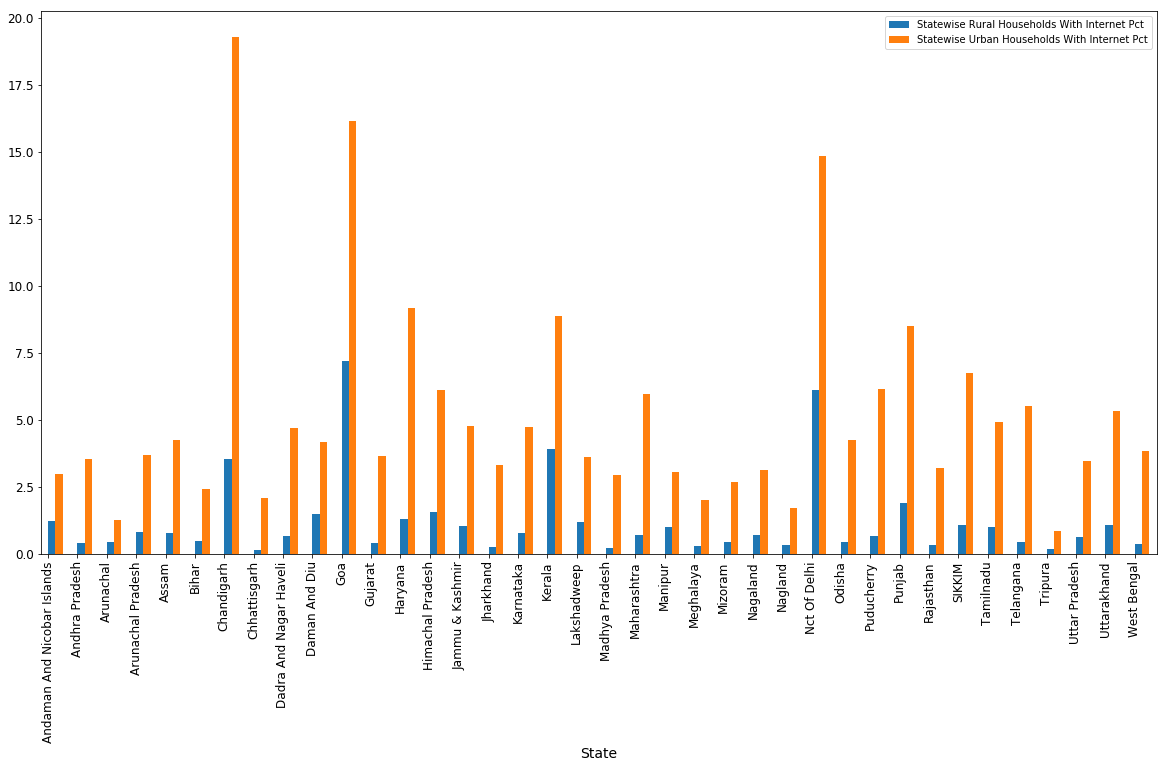

In [42]:
state_wise_cumulative = niti_df.groupby('State').agg({'Total Households': 'sum',
                                                      'Rural Households': 'sum',
                                                      'Urban Households': 'sum',
                                                      'Total Households With Internet Pct': 'sum', 
                                                      'Rural Households With Internet Pct': 'sum', 
                                                      'Urban Households With Internet Pct': 'sum', 
                                                      'District': 'count'})
state_wise_cumulative['Statewise Rural Households']  =  state_wise_cumulative['Rural Households'].divide(state_wise_cumulative['District'])
state_wise_cumulative['Statewise Urban Households']  =  state_wise_cumulative['Urban Households'].divide(state_wise_cumulative['District'])
state_wise_cumulative['Statewise Rural Households With Internet Pct']  =  state_wise_cumulative['Rural Households With Internet Pct'].divide(state_wise_cumulative['District'])
state_wise_cumulative['Statewise Urban Households With Internet Pct']  =  state_wise_cumulative['Urban Households With Internet Pct'].divide(state_wise_cumulative['District'])
state_wise_cumulative['Statewise Total Households With Internet Pct']  =  state_wise_cumulative['Total Households With Internet Pct'].divide(state_wise_cumulative['District'])
fig = plt.figure()
ax = fig.add_subplot(111)
state_wise_cumulative[['Statewise Rural Households With Internet Pct', 'Statewise Urban Households With Internet Pct']].plot.bar(figsize=(20,10), ax=ax, position=0)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
plt.xticks(rotation=90)
plt.show()

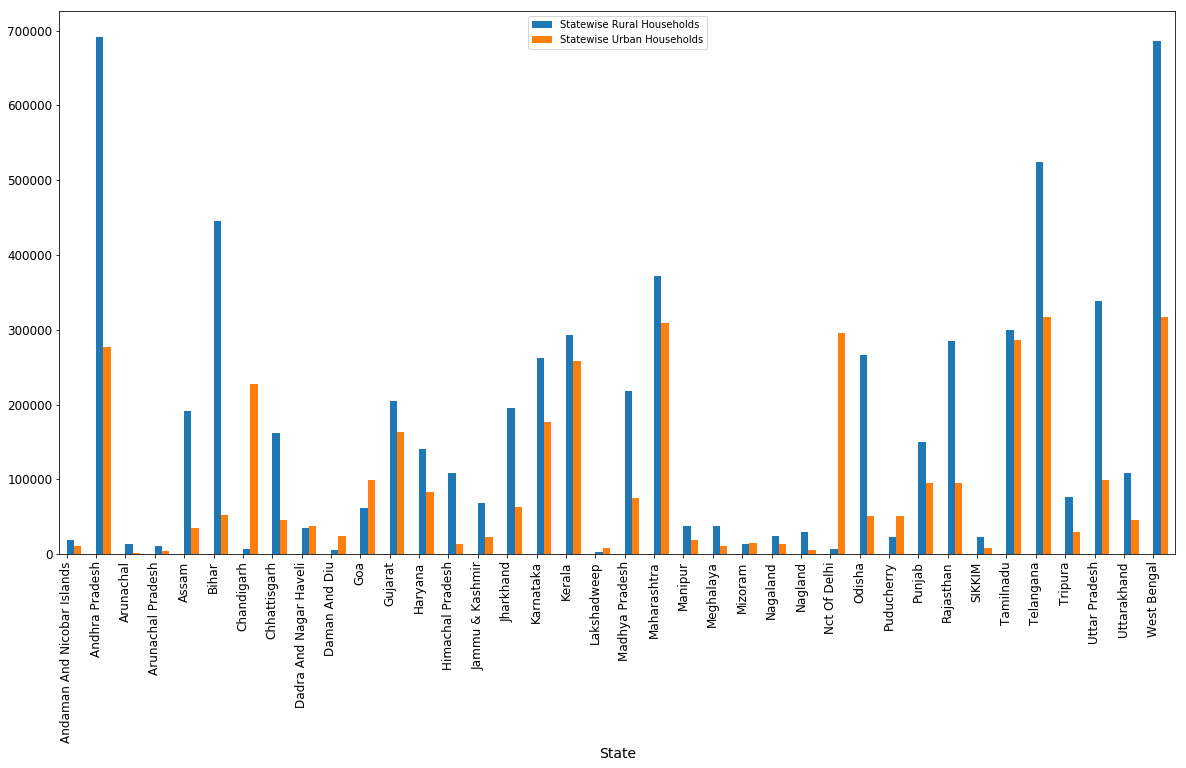

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
state_wise_cumulative[['Statewise Rural Households', 'Statewise Urban Households']].plot.bar(figsize=(20,10), ax=ax, position=0)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
plt.xticks(rotation=90)
plt.show()

In [135]:
'''
data obtained from https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDPb
'''
gdp_df = pd.read_excel('data/statewise_gdp.xlsx', converters={'2011–12': str, '2012–13': str, '2013–14': str, '2014–15': str, '2015–16': str, '2016–17':str}, index_col='State')
gdp_df.head()

,2011–12,2012–13,2013–14,2014–15,2015–16,2016–17
State,,,,,,
Andhra Pradesh,662592,815066,928666,532922,609934,699307
Arunachal Pradesh,11063,12547,14602,16761,19492,–
Assam,143175,156864,177745,198098,224234,–
Bihar,247144,282368,329475,410862,486430,–
Chhattisgarh,158074,177511,206690,234982,260776,290140


In [86]:
gdp_df.columns

Index(['2011–12', '2012–13', '2013–14', '2014–15', '2015–16', '2016–17'], dtype='object')

In [95]:
gdp_df = gdp_df.apply(lambda x: x.replace('–', '').replace('', 0).astype(int))

In [97]:
gdp_df.describe()

,2011–12,2012–13,2013–14,2014–15,2015–16,2016–17
count,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
mean,2.377709e+05,2.562158e+05,2.916214e+05,3.248358e+05,2.813932e+05,1.453024e+05
std,2.956244e+05,3.382278e+05,3.854417e+05,4.075018e+05,3.636716e+05,3.059483e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.264600e+04,1.335100e+04,1.579900e+04,1.832125e+04,0.000000e+00,0.000000e+00
50%,1.293490e+05,1.094700e+05,1.228550e+05,1.800415e+05,7.434550e+04,0.000000e+00
75%,3.488372e+05,3.834608e+05,4.392485e+05,4.971125e+05,5.008162e+05,2.955950e+04
max,1.272967e+06,1.448466e+06,1.647506e+06,1.792122e+06,1.212668e+06,1.338766e+06


In [134]:
'''
data obtained from http://164.100.47.190/loksabhaquestions/annex/11/AS83.pdf

GOVERNMENT OF INDIA
MINISTRY OF COMMUNICATIONS
DEPARTMENT OF TELECOMMUNICATIONS
LOK SABHA
STARRED QUESTION NO.83
TO BE ANSWERED ON 8TH FEBRUARY, 2017

INTERNET PENETRATION 
'''
internet_sub_df = pd.read_excel('data/Service Area wise percentage Internet Subscribers 2016.xlsx', sheetname='Data',  index_col='State')
internet_sub_df['subscribers_per_100'] = internet_sub_df['Internet subscribers per 100 population ']
internet_sub_df['subscribers_in_million'] = internet_sub_df['Internet subscribers in million ']
internet_sub_df = internet_sub_df.drop(columns=['Internet subscribers per 100 population ', 'Internet subscribers in million '])
internet_sub_df.head()

C:\Users\Sid\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,subscribers_per_100,subscribers_in_million
State,,
Andhra Pradesh|Telengana,30.94,27.46
Assam,22.20,7.25
Bihar|Jharkhand,15.26,21.13
Gujarat,36.21,23.17
Haryana,29.95,8.30


In [119]:
internet_sub_df['subscribers_count_pct'] = internet_sub_df['subscribers_in_million'] * 100 / internet_sub_df['subscribers_in_million'].sum()
internet_sub_df.head()

,subscribers_per_100,subscribers_in_million,subscribers_count_pct
State,,,
Andhra Pradesh|Telengana,30.94,27.46,7.472922
Assam,22.20,7.25,1.973004
Bihar|Jharkhand,15.26,21.13,5.750286
Gujarat,36.21,23.17,6.305448
Haryana,29.95,8.30,2.258749


In [120]:
internet_sub_df.columns

Index(['subscribers_per_100', 'subscribers_in_million',
       'subscribers_count_pct'],
      dtype='object')

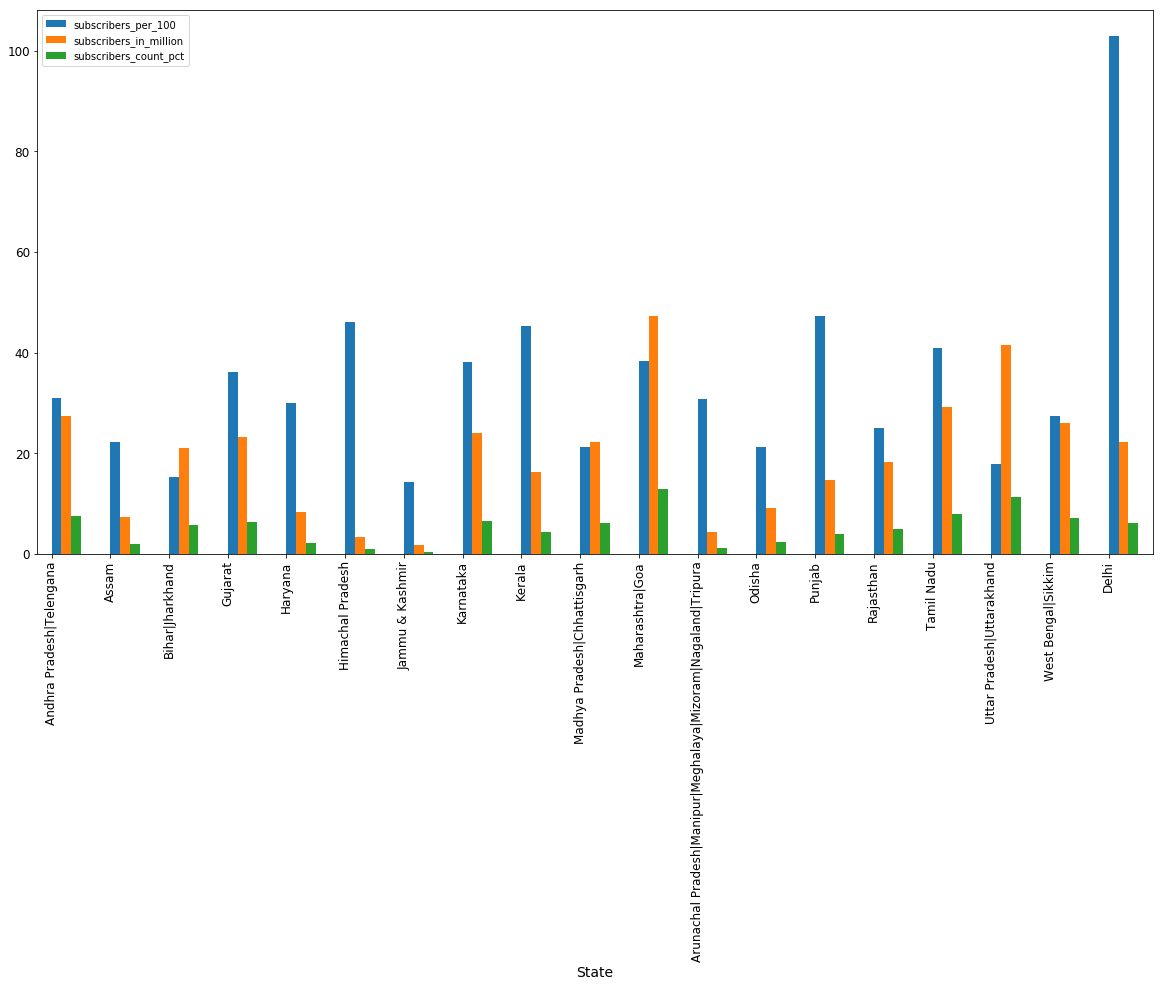

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111)
internet_sub_df[['subscribers_per_100', 'subscribers_in_million', 'subscribers_count_pct']].plot.bar(figsize=(20,10), ax=ax, position=0)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
plt.xticks(rotation=90)
plt.show()

In [141]:
'''
data obtained from https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_area

'''
statewise_landarea_df = pd.read_csv('data/statewise_landarea.csv', index_col='State')
statewise_landarea_df['Area'] = statewise_landarea_df['Area'].str.replace(',', '').astype(int)
statewise_landarea_df = statewise_landarea_df.drop(columns=['Rank'])

statewise_landarea_df.head()

,Area,Region,National Share Pct,Country of comparable size,Ref
State,,,,,
Rajasthan,342239,Western,10.41,Republic of the Congo,NaN
Madhya Pradesh,308350,Central,9.37,Oman,NaN
Maharashtra,307713,Western,9.36,Oman,NaN
Uttar Pradesh,243290,Northern,7.33,United Kingdom,NaN
Jammu and Kashmir,222236,Northern,6.76,Guyana,NaN


In [142]:
statewise_landarea_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Rajasthan to Lakshadweep
Data columns (total 5 columns):
Area                          36 non-null int32
Region                        36 non-null object
National Share Pct            36 non-null float64
Country of comparable size    36 non-null object
Ref                           0 non-null float64
dtypes: float64(2), int32(1), object(2)
memory usage: 1.5+ KB


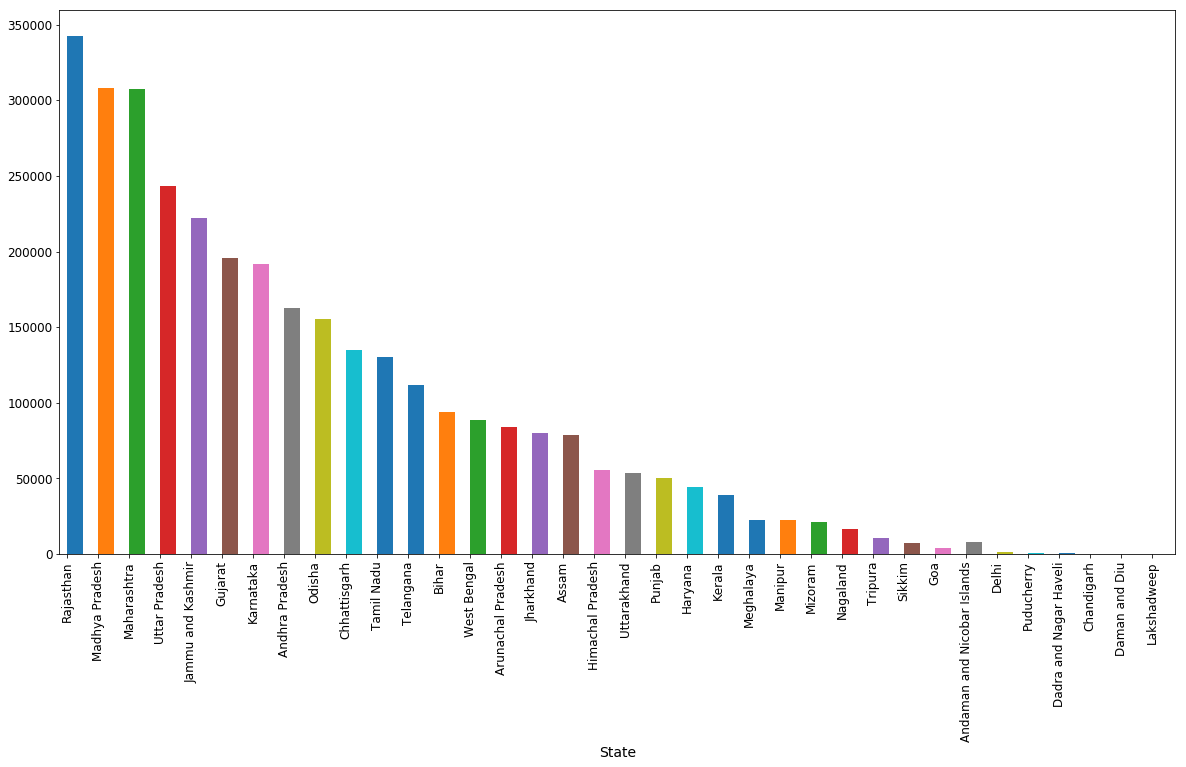

In [143]:
fig = plt.figure()
ax = fig.add_subplot(111)
statewise_landarea_df['Area'].plot.bar(figsize=(20,10), ax=ax, position=0)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''
Data we have:
    - Utility services - district wise information about the electricity, internet, landline, mobile connection [available at urban and rural level]
    - statewise gdp
    - statewise internet subscribers
    - statewise land area
    - block level census information

Questions to be answered:
1. Is there a co relation between GDP with utility services
2. Is there a co relation between land area and utility services

'''

